# External modules

In [1]:
library(tidyverse)
library("DataExplorer")
library(DescTools)
library(Hmisc)
library("scatterplot3d")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are 

In [2]:
options(repr.plot.width=19, repr.plot.height=12)

# Internal modules

In [3]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

# Data

In [4]:
source <- "./06_experimentation_1/final_dataset.csv"

In [6]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [7]:
str(data)

'data.frame':	22846 obs. of  59 variables:
 $ timestamp             : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude    : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity              : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ lateral_error         : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error    : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ haversine_error       : num  0.576 0.572 0.569 0.6 0.579 ...
 $ latitude_error        : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error       : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ heading_error         : num  1.95 1.97 2.15 2.08 2.13 ...
 $ lateral_error_abs     : num  0.

# Outlier detection

In [8]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

## lateral_error_abs

In [9]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [10]:
print(names(data_lateral_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [11]:
print(data_lateral_error_abs_object$outlier_positions)

  [1]  2347  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358
 [13]  2359  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370
 [25]  2371  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382
 [37]  2383  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394
 [49]  2395  4810  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [61]  4821  4822  4823  4824  4825  4826  4827  4828 16604 16605 16606 16607
 [73] 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619
 [85] 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631
 [97] 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643
[109] 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 18391
[121] 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403
[133] 18404 18405 18406 18407 18408 18409 18410 18411 18416 18417 18418 18419
[145] 18420 18421 18422 18423 18424 18425 18426 18427 18428 1842

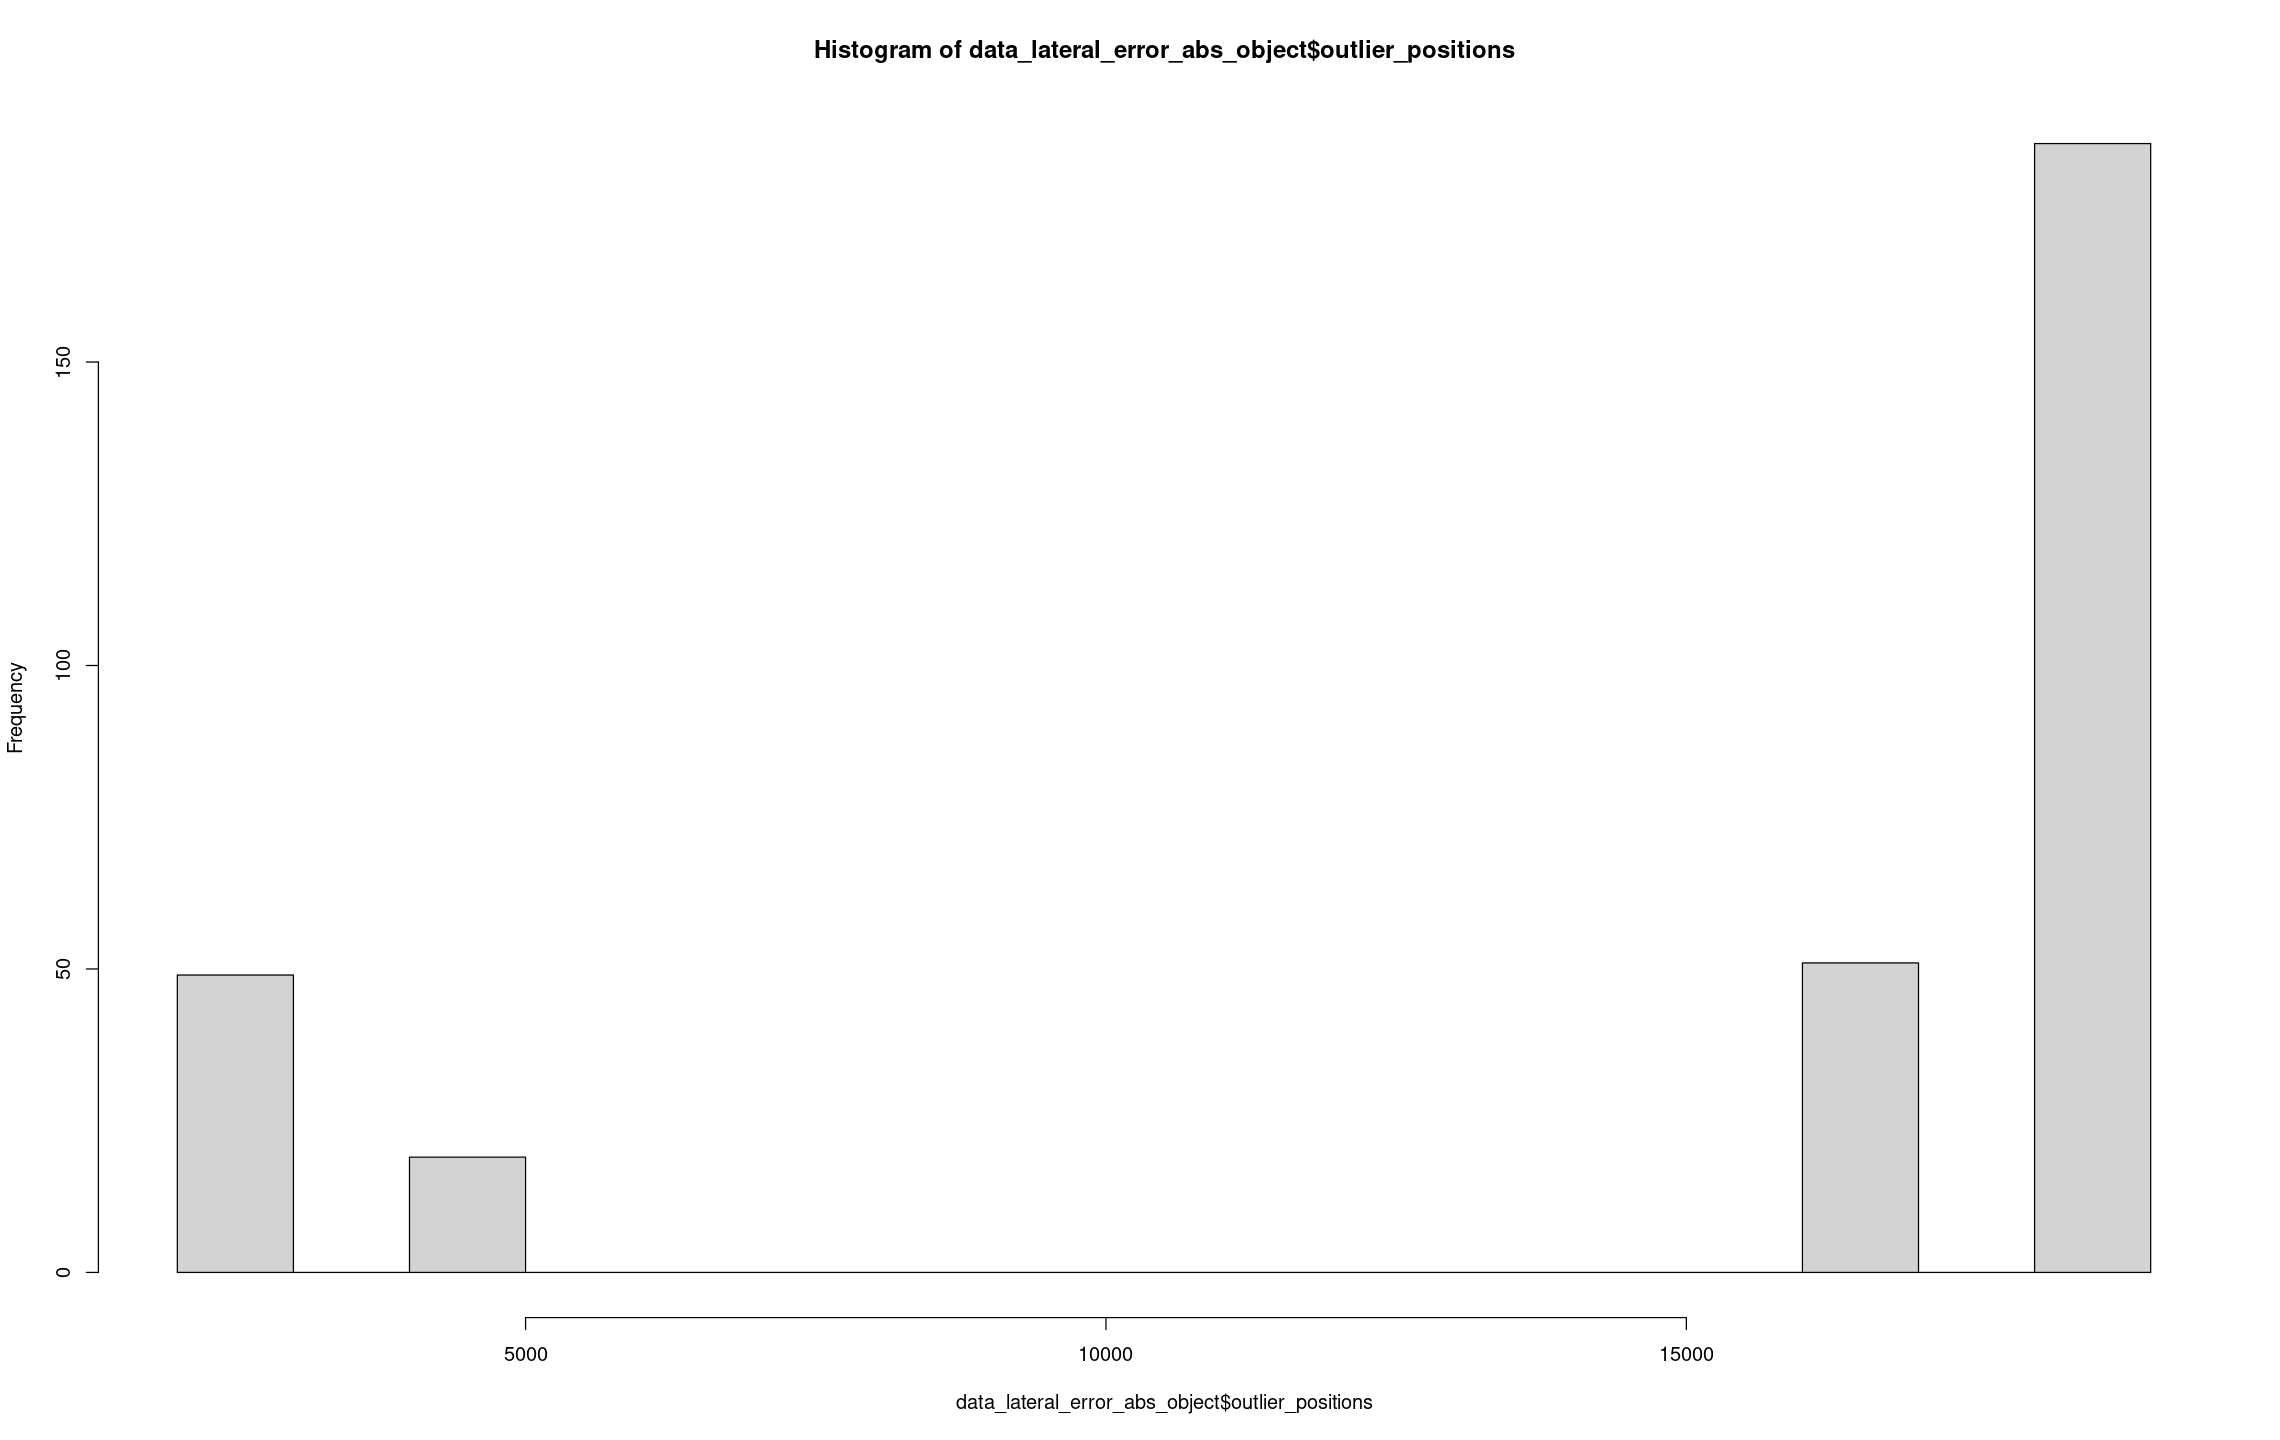

In [12]:
hist(data_lateral_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'846        22'846             0        22'580             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0481903097  0.0872314461  0.1457093060  0.3255155981  0.6313109547
                                                                      
         range            sd         vcoef           mad           IQR
  4.9767084120  0.5421802981  1.1428696750  0.3093819649  0.4856016487
                                                                      
          mean         meanCI
  0.4744025587   0.4673716777
                 0.4814334397
                             
           .90            .95
  0.9

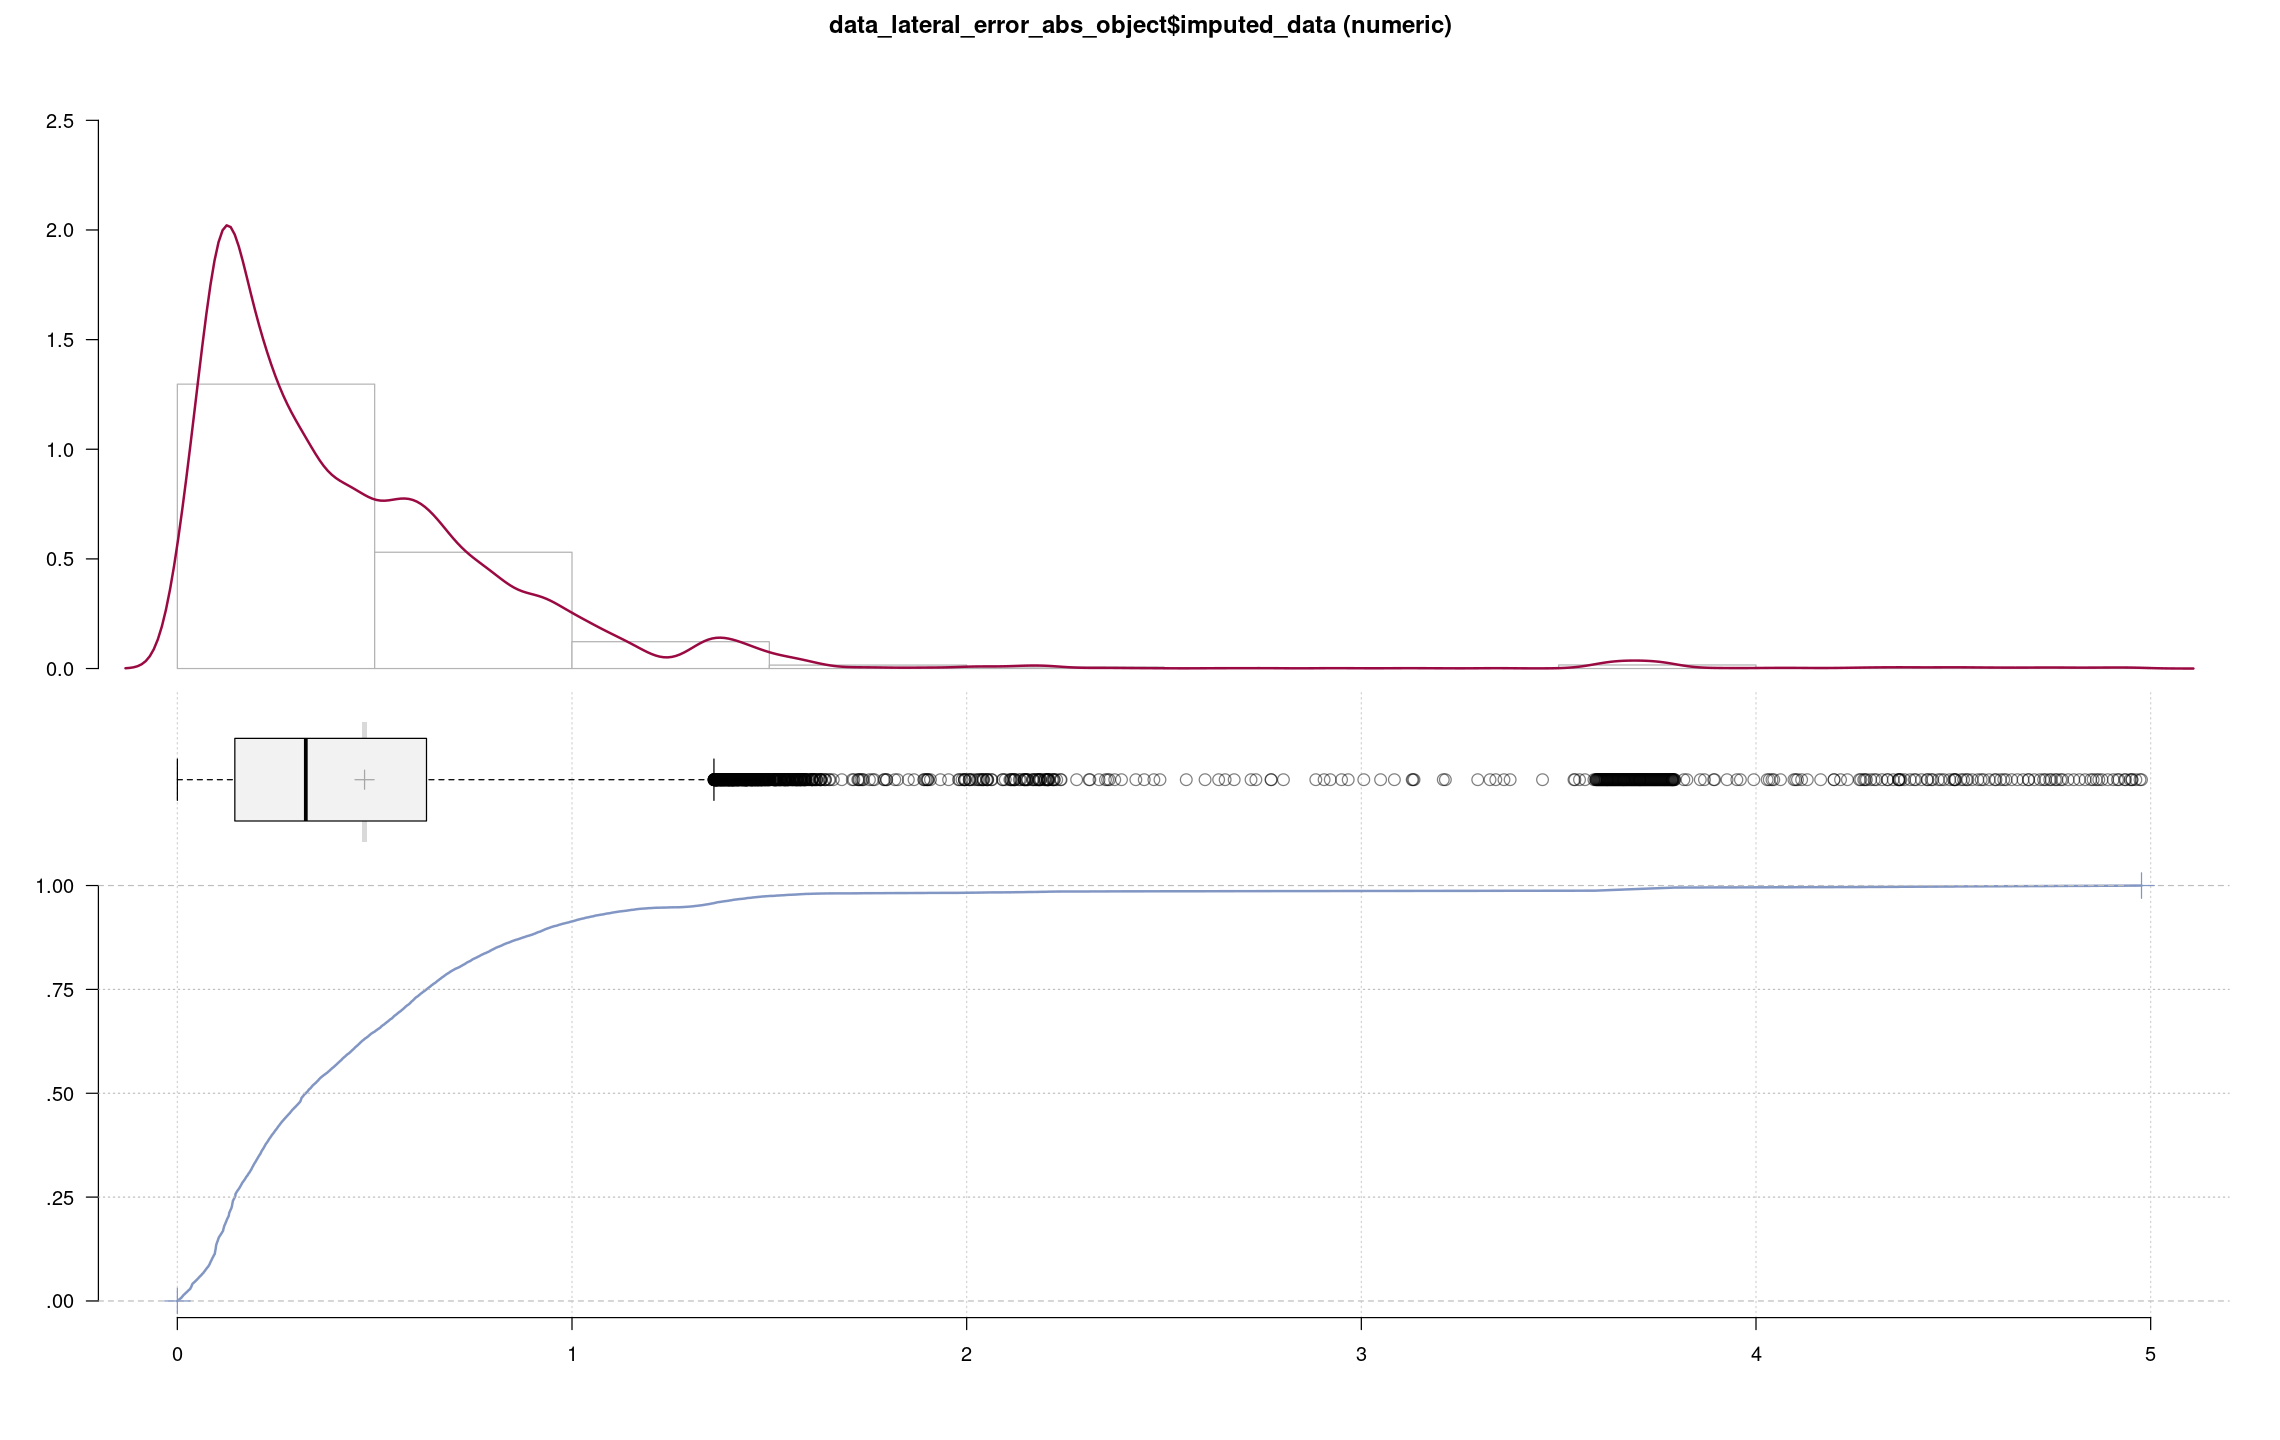

In [13]:
Desc(data_lateral_error_abs_object$imputed_data)

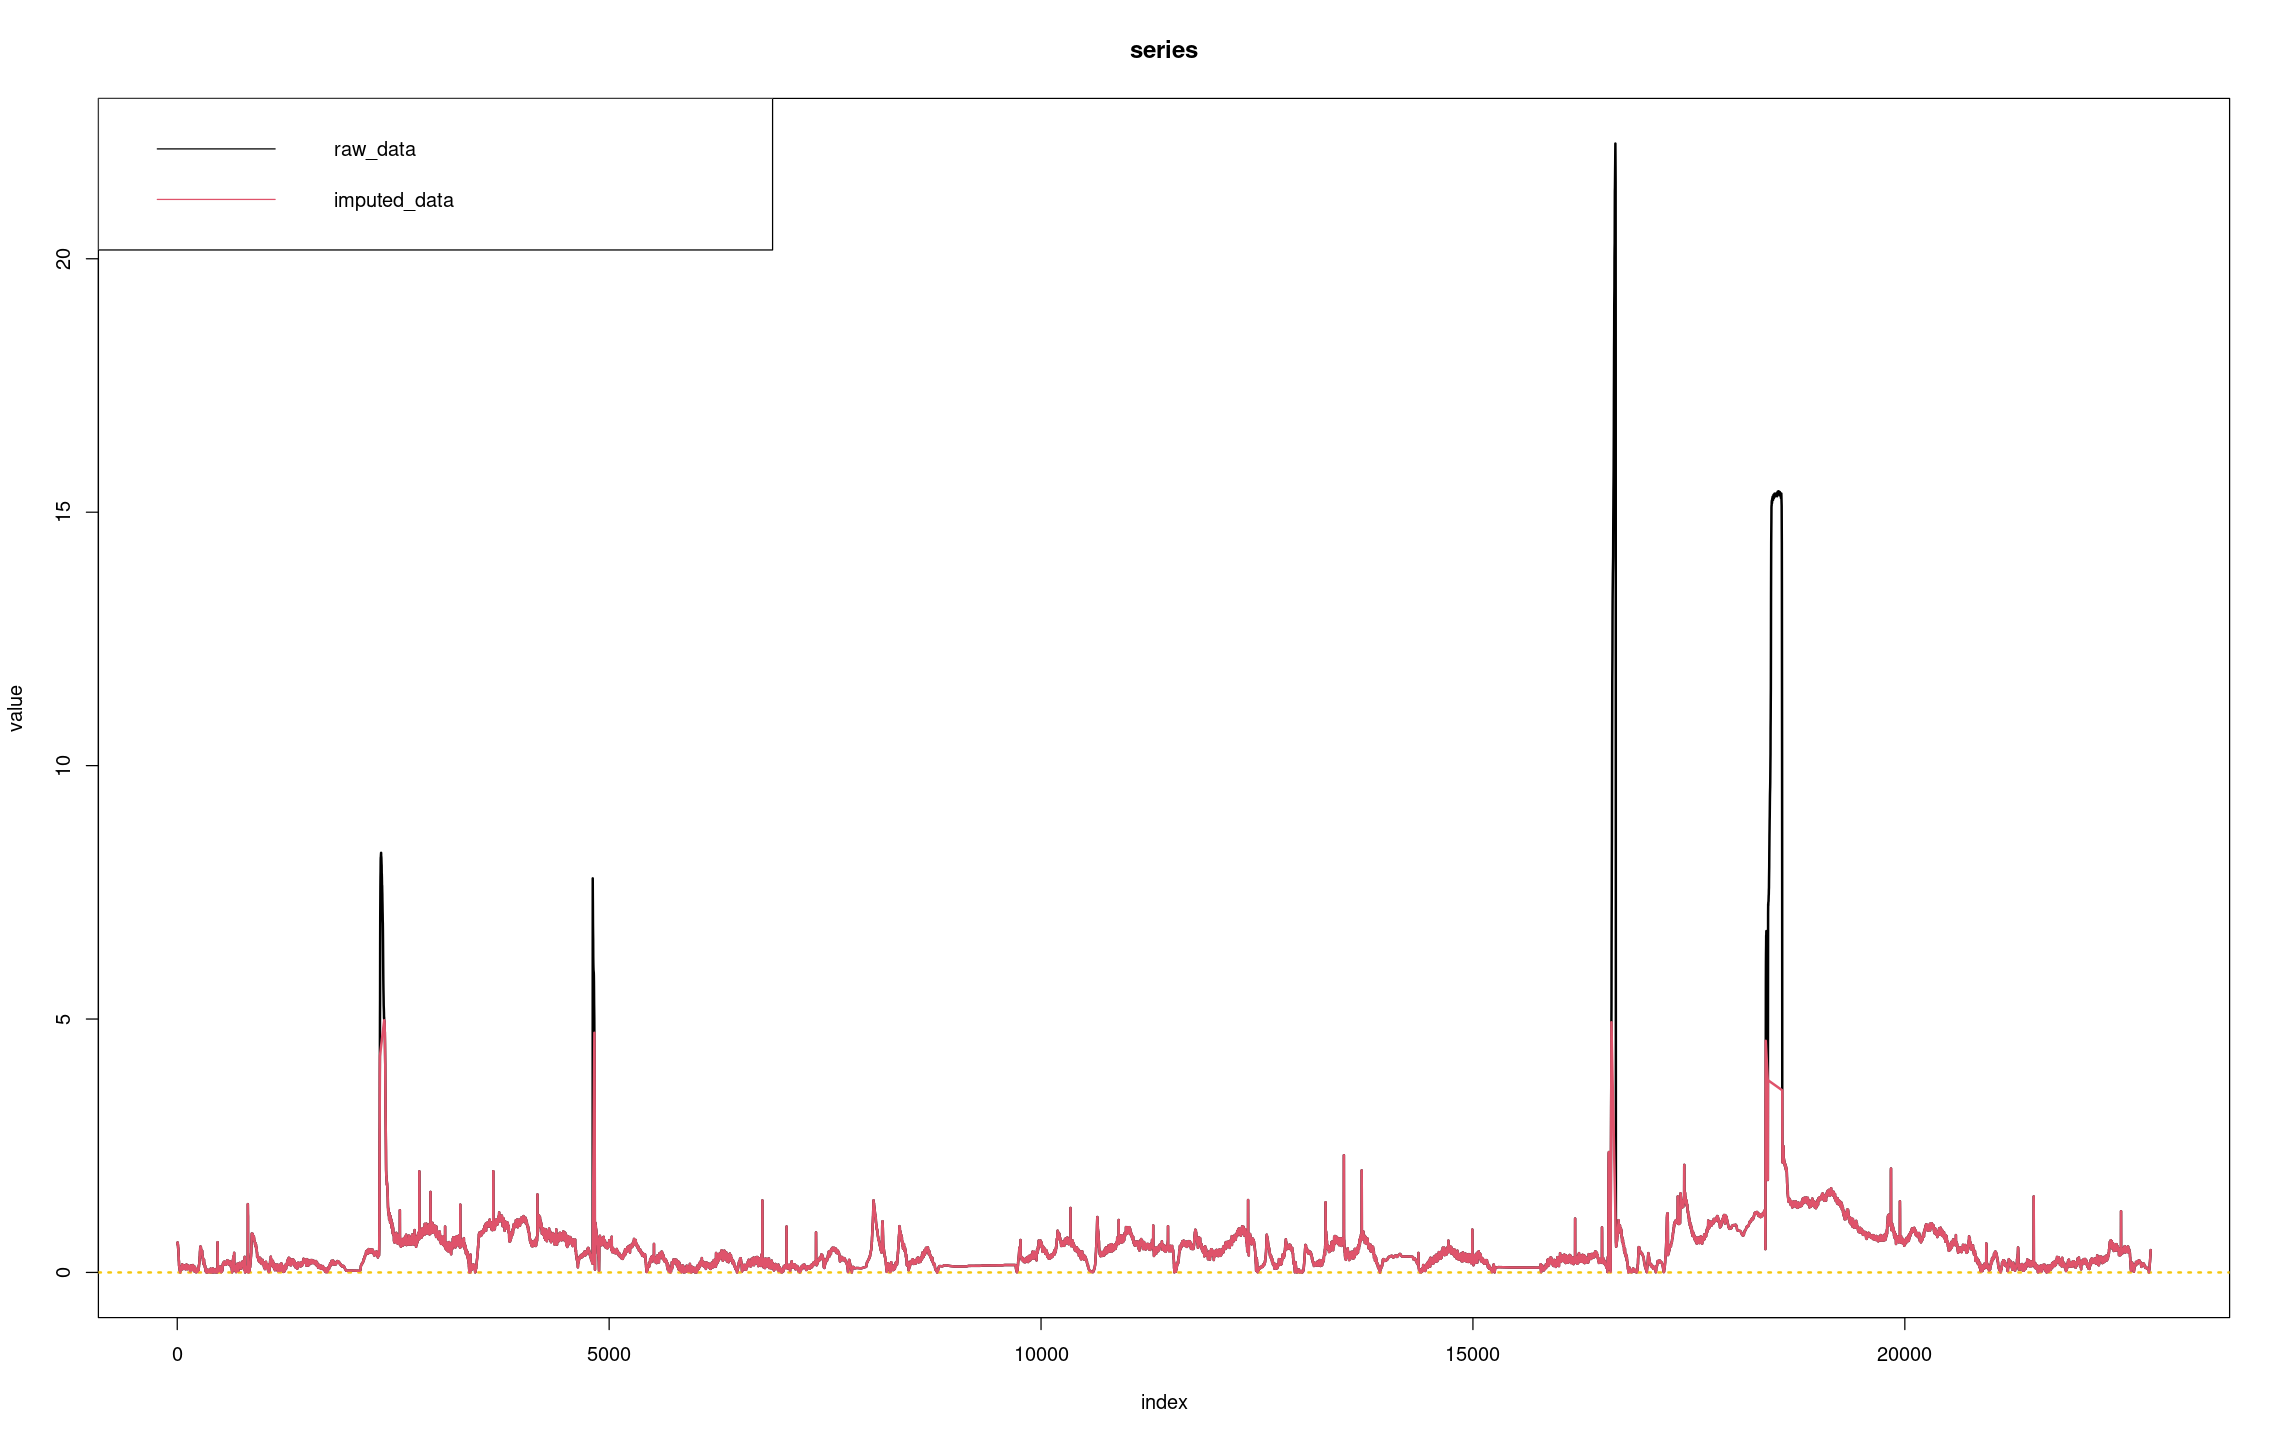

In [14]:
plot(data_lateral_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error_abs

In [15]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [16]:
print(names(data_longitudinal_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [17]:
print(data_longitudinal_error_abs_object$outlier_positions)

 [1]  4810  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
[13]  4822  4823  4824  4825  4826  4827  4828  4829 16609 16610 16611 16612
[25] 16613 16614 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624
[37] 16625 16626 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636
[49] 16637 16638 16639 16640 16641 16642 16643 16644 16645 16646 16647 16648
[61] 16649 16650 16651 16652 16653 18387 18388 18389 18390 18391 18392 18393
[73] 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405
[85] 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415


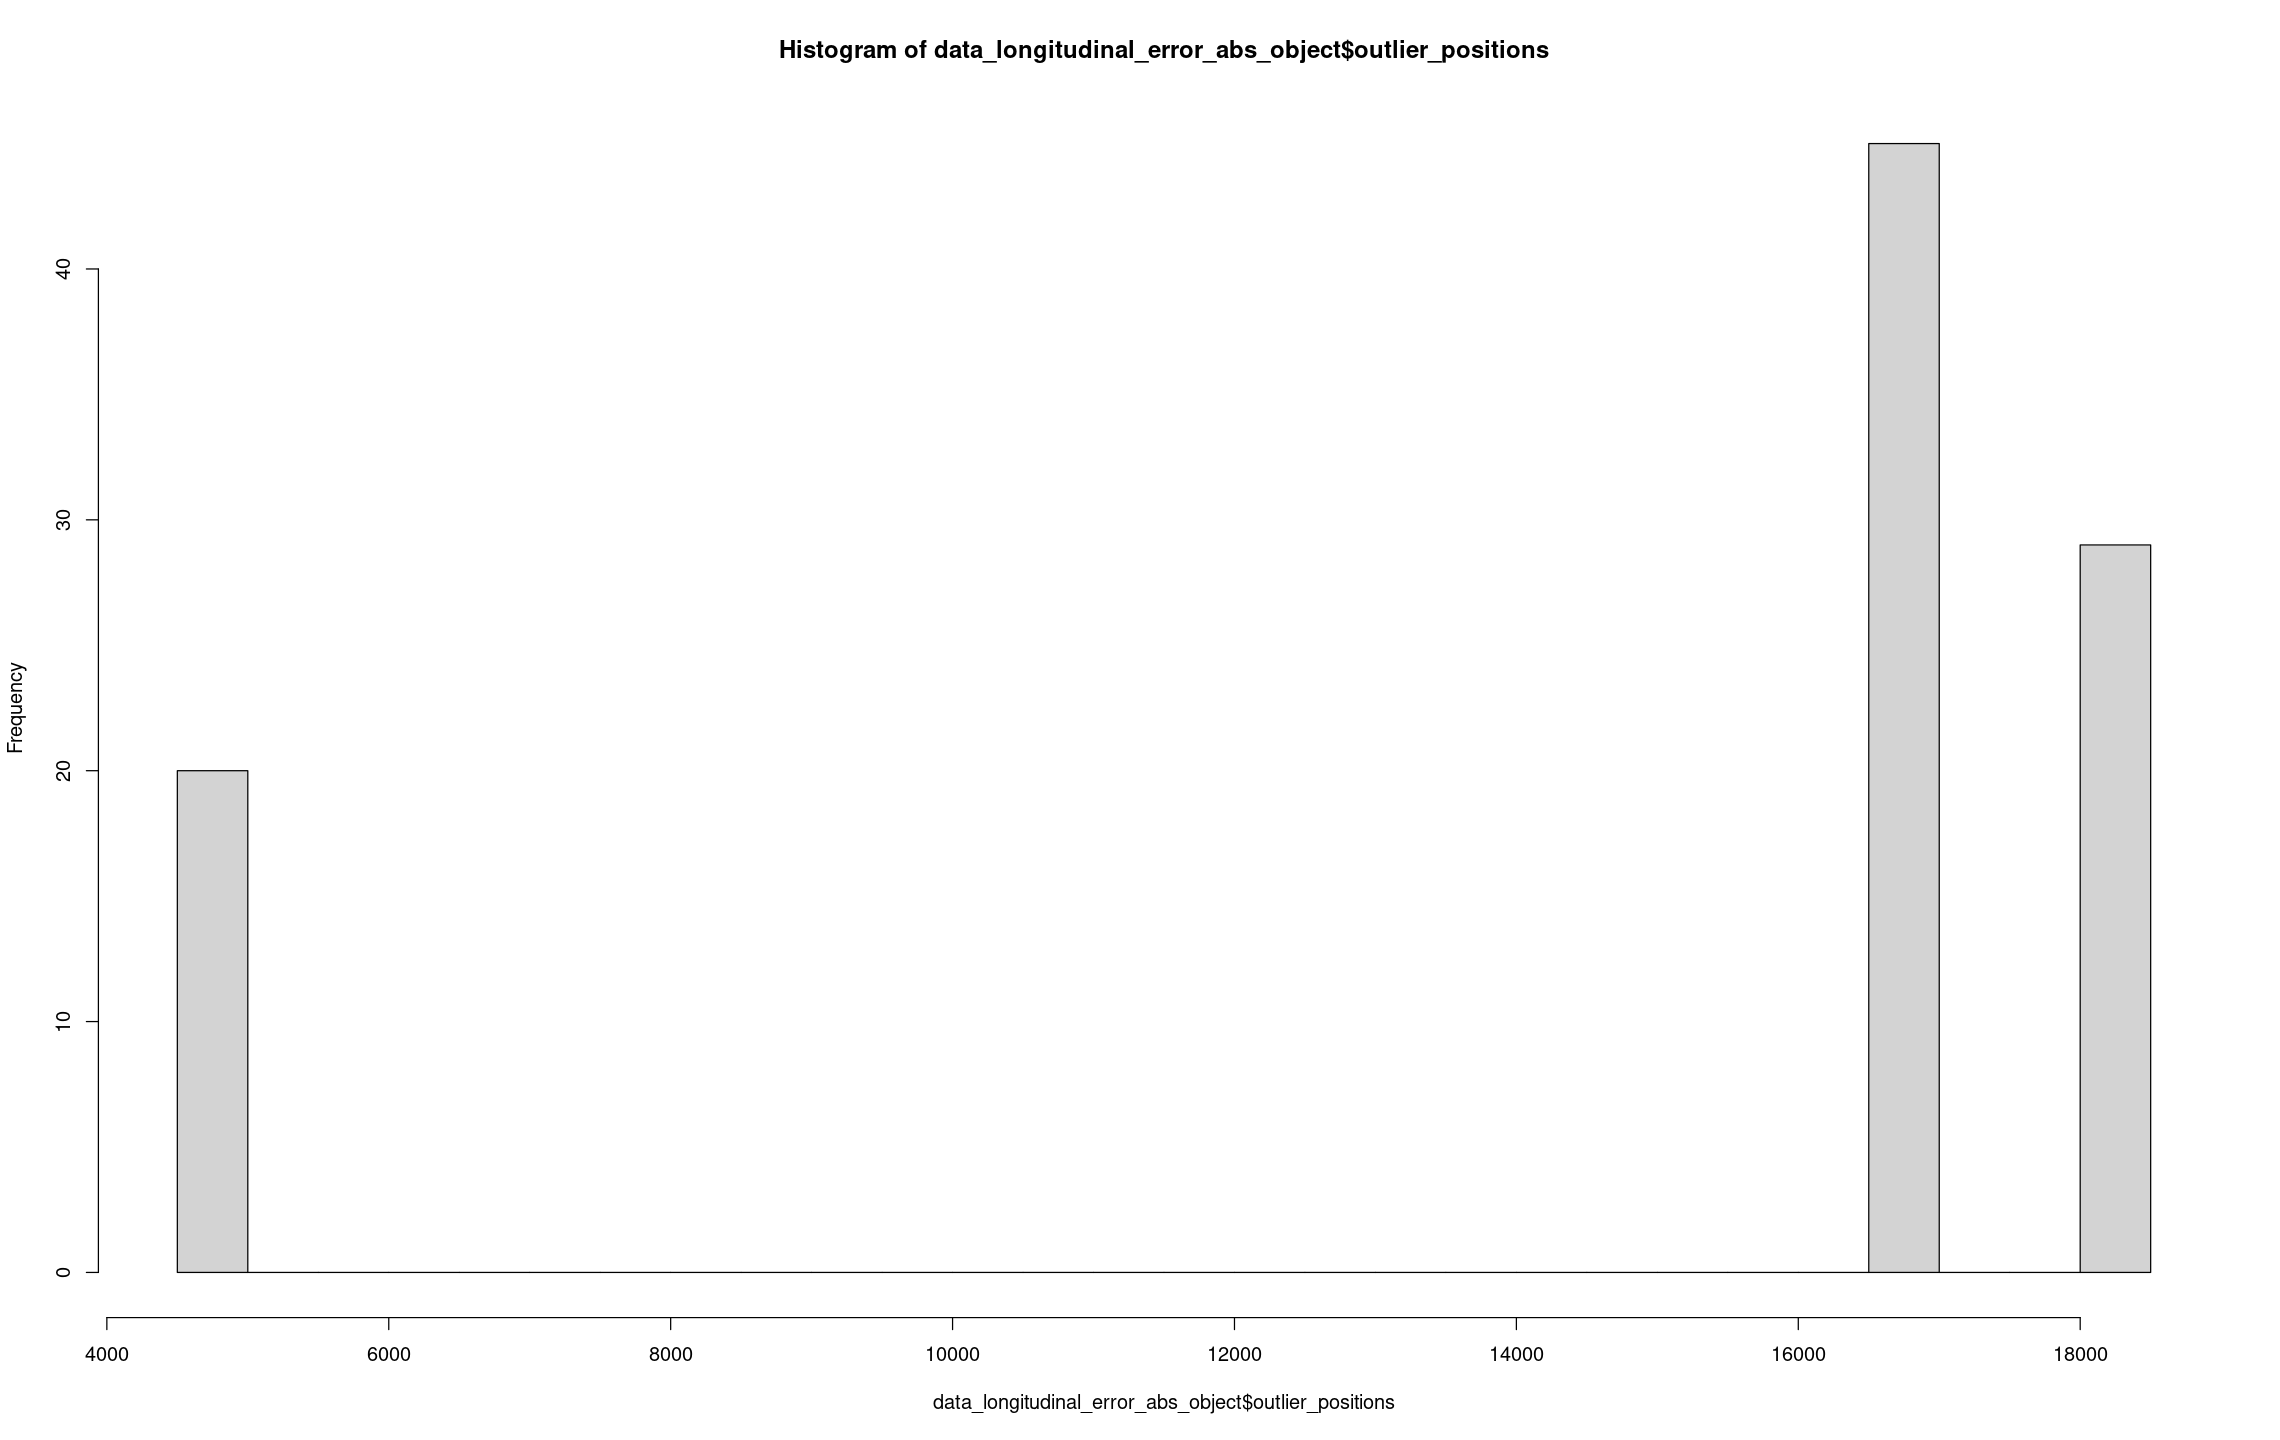

In [18]:
hist(data_longitudinal_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'846        22'846             0        22'576             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0074603134  0.0154924053  0.0475801267  0.1227869280  0.2790804729
                                                                      
         range            sd         vcoef           mad           IQR
  2.3340343712  0.2128521352  1.0922180094  0.1407675924  0.2315003462
                                                                      
          mean         meanCI
  0.1948806313   0.1921204092
                 0.1976408534
                             
           .90            .95


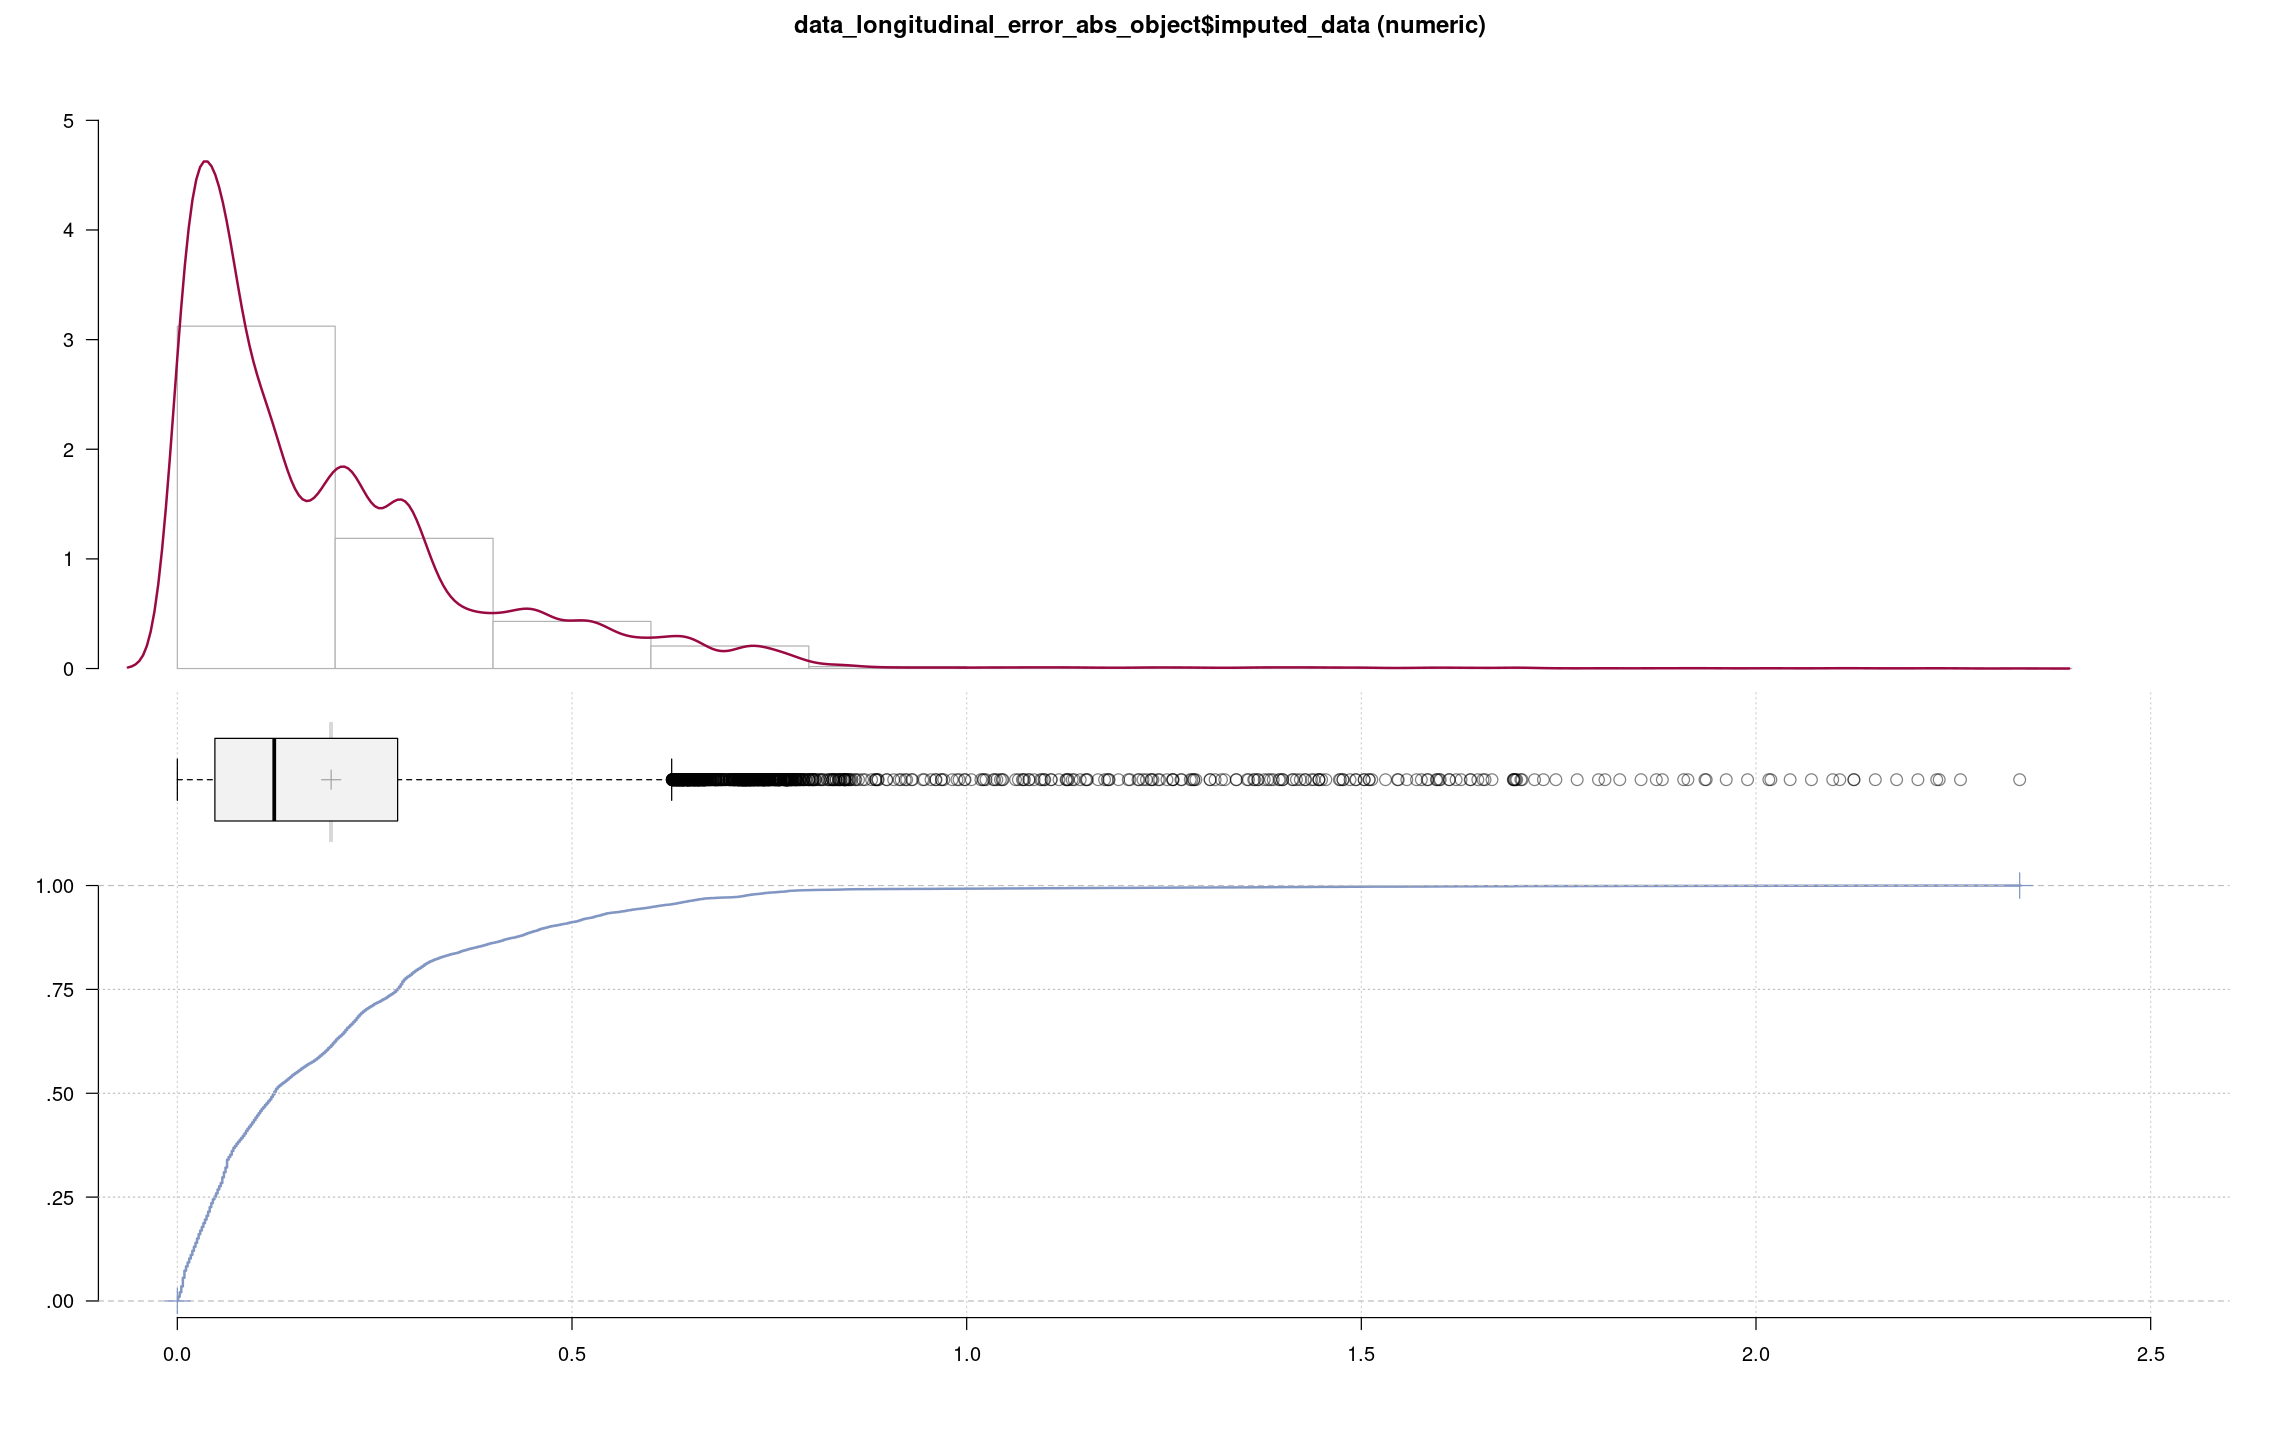

In [19]:
Desc(data_longitudinal_error_abs_object$imputed_data)

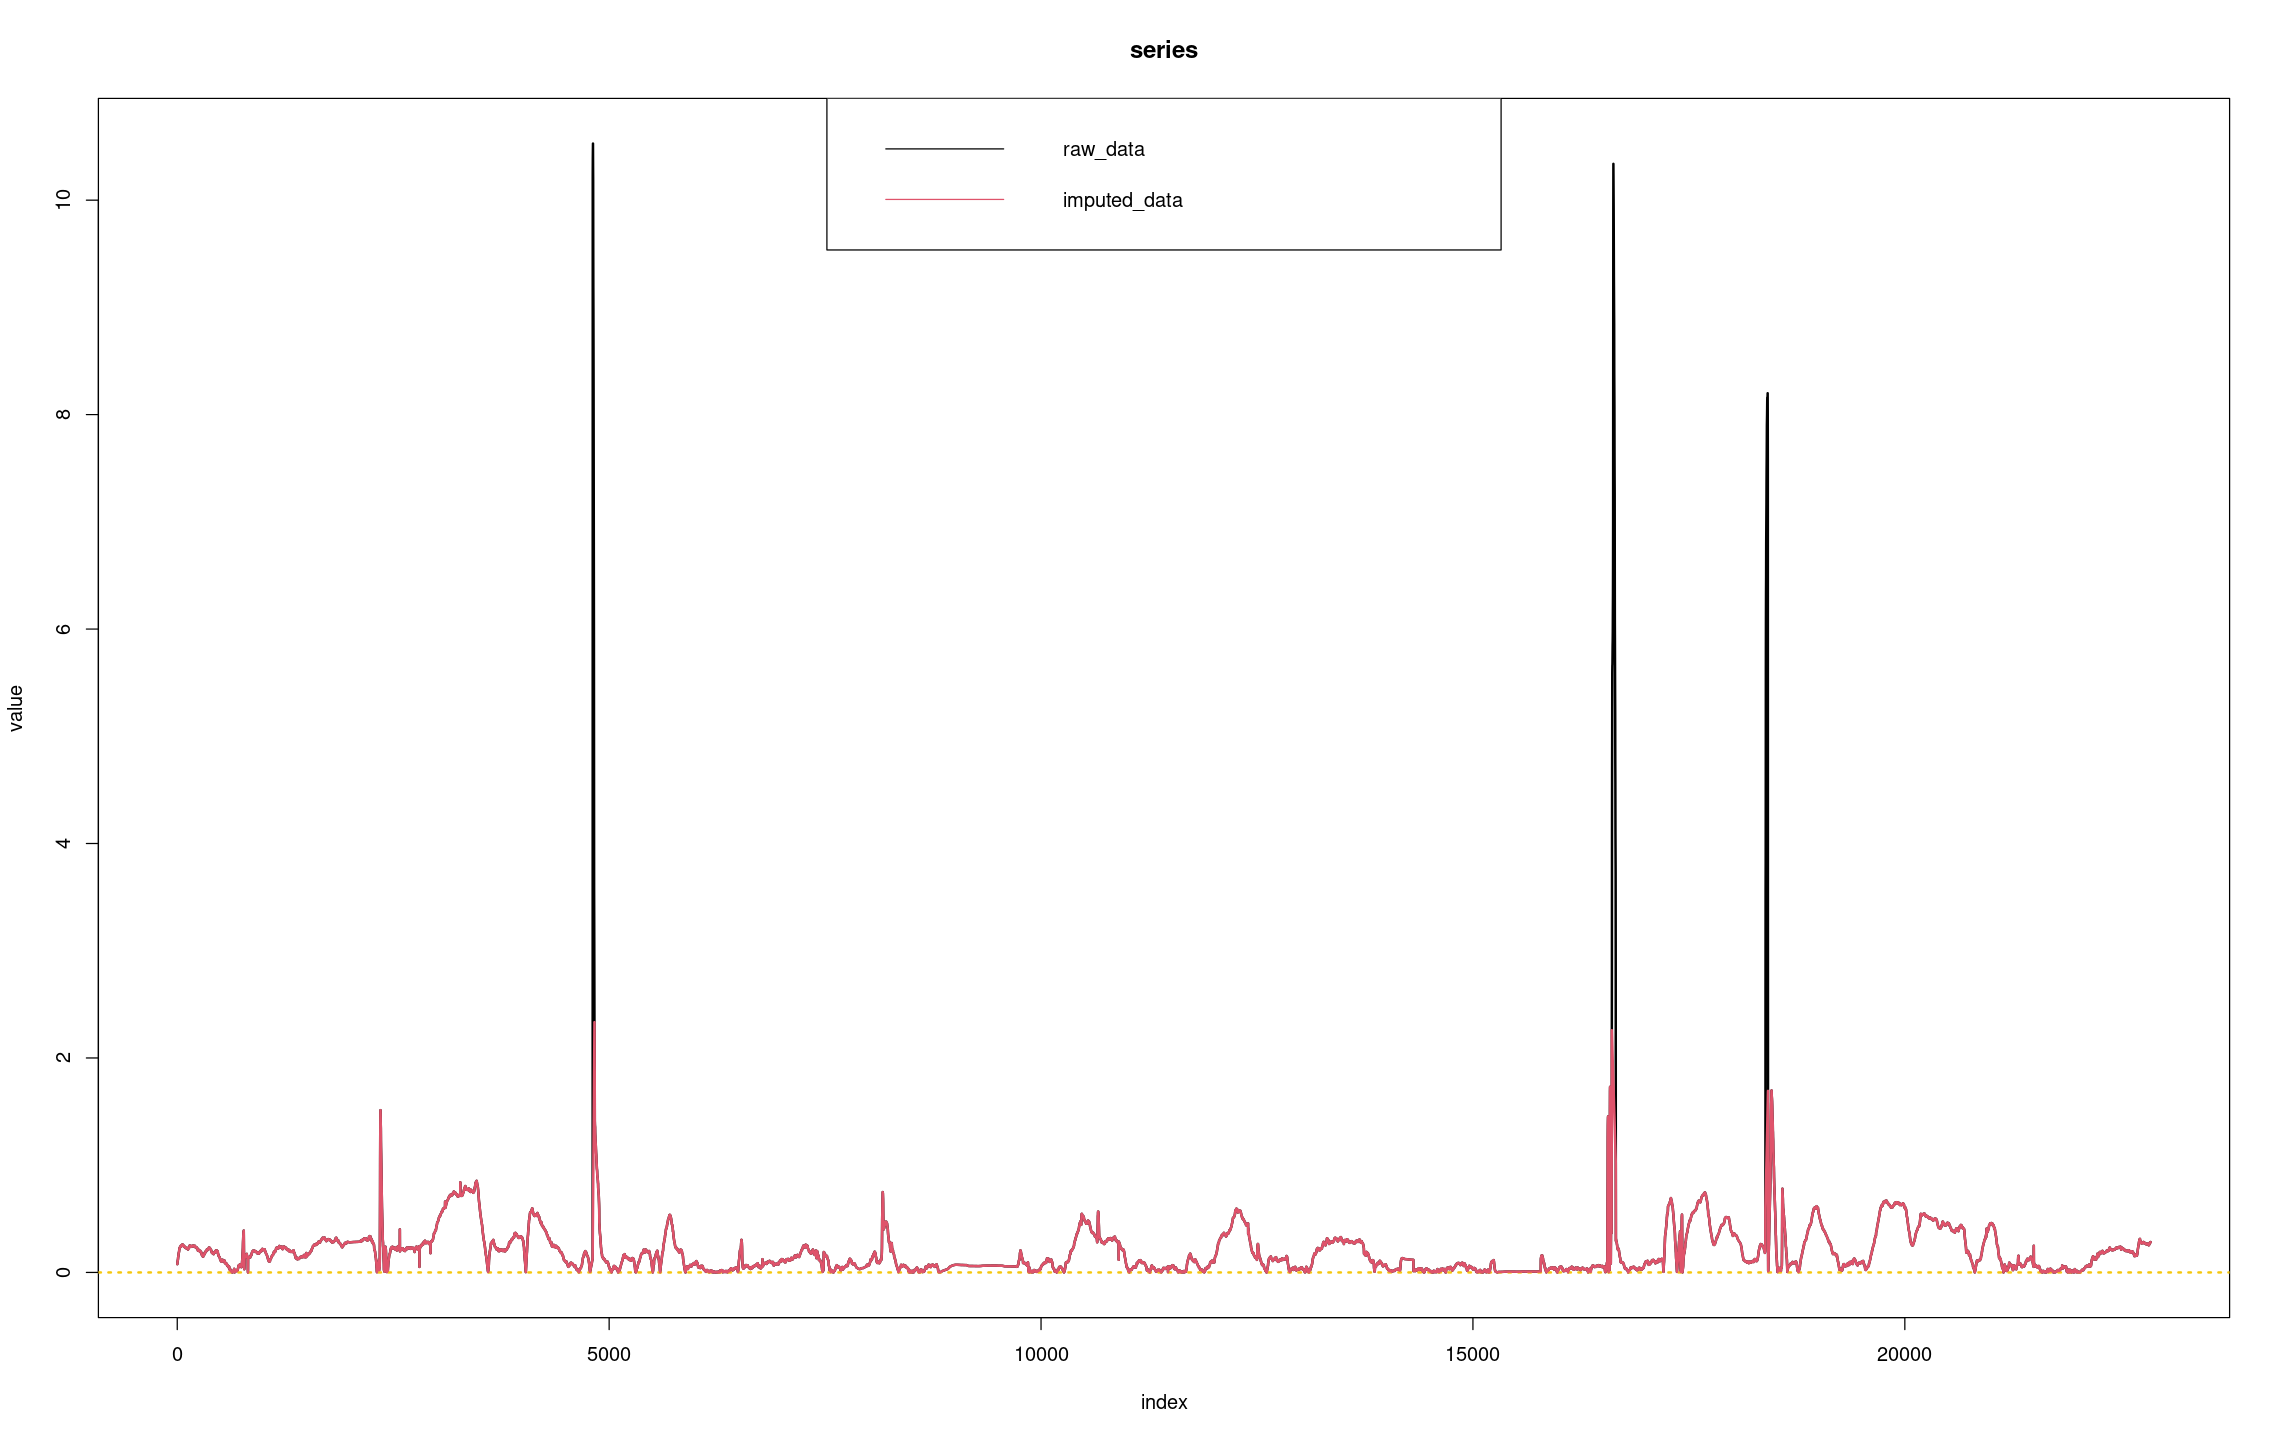

In [20]:
plot(data_longitudinal_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("top", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)
